In [ ]:
from smol_generator import *
import torch 
import torch.nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
# grab sample photo and convert to tensor 
import cv2

image = cv2.imread('7_8.jpg',1)
input_tensor = torch.from_numpy(image.reshape((1,3,256,256))).float()

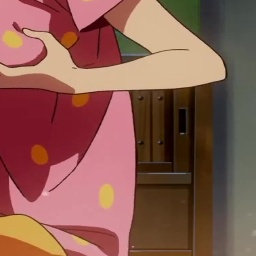

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [ ]:
g = Generator() .cuda()

optimizer = optim.Adam(g.parameters(), lr=0.001)
criterion = nn.MSELoss()

input_tensor = input_tensor.cuda()
  

In [ ]:
for _ in range(5000):

  optimizer.zero_grad()
  recon_image = g(input_tensor)
  loss = criterion(recon_image, input_tensor)

  loss.backward()
  optimizer.step()

  if _ % 10 == 0:
    print(_, loss.item())

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


0 14729.9560546875
10 14178.8388671875
20 13693.1513671875
30 13209.0625
40 12743.296875
50 12298.02734375
60 11872.314453125
70 11464.03125
80 11075.474609375
90 10701.3955078125
100 10353.375
110 10003.6474609375
120 9673.18359375
130 9357.037109375
140 9242.27734375
150 8895.859375
160 8569.71484375
170 8286.189453125
180 8022.1298828125
190 7770.626953125
200 7530.31982421875
210 7300.23974609375
220 7081.3291015625
230 6868.18896484375
240 6663.55419921875
250 6491.03271484375
260 6282.927734375
270 6100.7216796875
280 5927.5751953125
290 5761.19873046875
300 5602.009765625
310 5451.19775390625
320 5304.1455078125
330 5163.1435546875
340 5028.5205078125
350 4898.9501953125
360 4775.15576171875
370 4655.37939453125
380 4544.4453125
390 4432.1669921875
400 4325.3076171875
410 4229.0546875
420 4129.12158203125
430 4034.75390625
440 3950.353271484375
450 3873.0322265625
460 3781.93896484375
470 3699.9375
480 3623.243896484375
490 3550.58642578125
500 3482.314208984375
510 3418.5400390

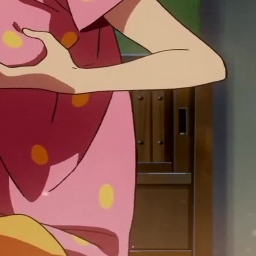

In [ ]:
new_image = torch.clip(recon_image.reshape((256,256,3)), 0, 255)
new_image = new_image.type(torch.uint8)
np_image = new_image.cpu().numpy()
cv2_imshow(np_image)

In [ ]:
noise_smol = torch.randn((1,3,64,64)).cuda()
out = g(noise_smol)
diff = (noise_smol - out) ** 2
print(diff.mean())

tensor(13288.1045, device='cuda:0', grad_fn=<MeanBackward0>)


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
